# **Logistic Regression**

Logistic Regression is a statistical method usually used for  **binary classification** problems. 

It models the probability that a given input belongs to a particular category using the **logistic (sigmoid) function**. 

Unlike linear regression, which predicts continuous values, logistic regression predicts the likelihood of an outcome that can only be one of **two possible classes**. 

It is widely used in machine learning for tasks such as **spam detection, disease diagnosis, and credit scoring**.

## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into **a probability value between 0 and 1**.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an **S shaped curve**. It is also called sigmoid curve.

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png"/>

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0 

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png"/>

# **4. Types of Logistic Regression** <a class="anchor" id="4"></a>


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the **target** variable has **two possible categories**. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.


### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has **three or more categories** which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.


### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more **ordinal categories**. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.

## Examples with Logistic Regression - Social Network Ad (Simple)

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#import necessary libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#read the dataset
df = pd.read_csv('2_1_logistic_regression_social_network_ads_dataset.csv')

#display the first few rows of the dataset
df.sample(10)

,user_id,gender,age,estimated_salary,purchased
348,15579212,Male,39,77000,0
350,15800515,Female,38,113000,1
323,15619465,Female,48,30000,1
375,15646091,Female,46,32000,1
12,15746139,Male,20,86000,0
373,15708791,Male,59,130000,1
60,15814004,Male,27,20000,0
72,15595228,Female,20,23000,0
309,15652400,Female,38,50000,0
376,15596984,Female,46,74000,0


In [ ]:
# https://www.kaggle.com/datasets/akram24/social-network-ads

In [5]:
#drop unnecessary columns user_id
# df = df.drop(columns=['user_id'])

df.head()

,gender,age,estimated_salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
# get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            400 non-null    object
 1   age               400 non-null    int64 
 2   estimated_salary  400 non-null    int64 
 3   purchased         400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
#describe the dataset
df.describe()

,age,estimated_salary,purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
#see the distribution of the target variable
df["purchased"].value_counts()

purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
df["purchased"].value_counts( normalize=True ) *100

purchased
0    64.25
1    35.75
Name: proportion, dtype: float64

In [10]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(20)

In [12]:
# show some rows duplicated with keep=False -> means show all duplicated
# df[df.duplicated(keep=False)]

In [13]:
# show some rows duplicated with keep=False -> means show all duplicated
# df[df.duplicated(keep=False)]

In [12]:
# let's delete the duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(380, 4)

In [14]:
df

,gender,age,estimated_salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            400 non-null    object
 1   age               400 non-null    int64 
 2   estimated_salary  400 non-null    int64 
 3   purchased         400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [15]:
df.head()

,gender,age,estimated_salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [16]:
# convert the 'gender' column to numerical values
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})   

In [17]:
df

,gender,age,estimated_salary,purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            400 non-null    int64
 1   age               400 non-null    int64
 2   estimated_salary  400 non-null    int64
 3   purchased         400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [20]:
#plot histograms with KDE for all features in the dataset
features = df.columns.values
print(features)


['gender' 'age' 'estimated_salary' 'purchased']


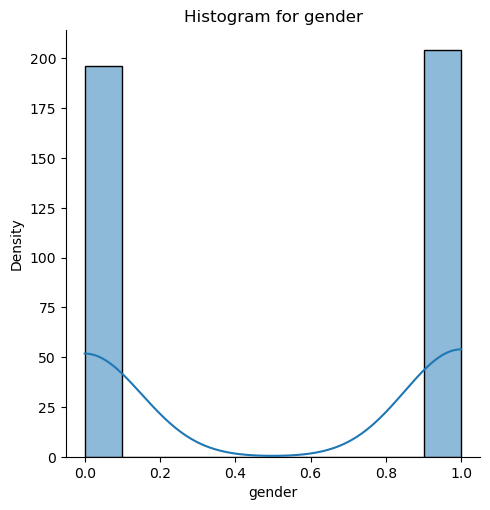

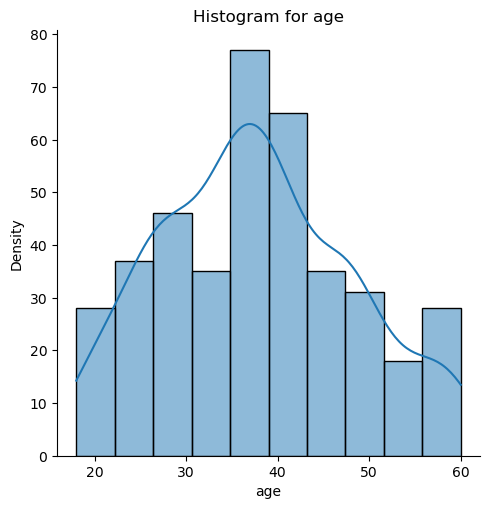

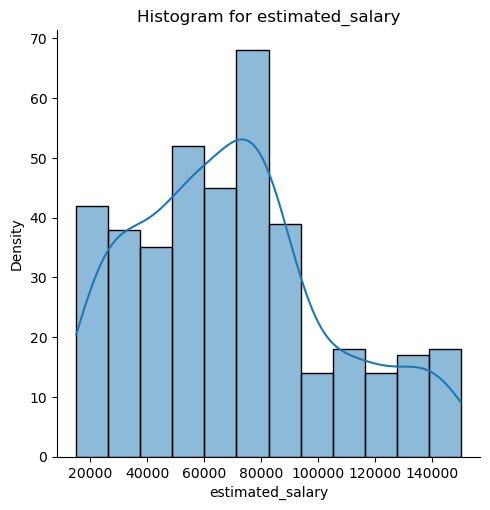

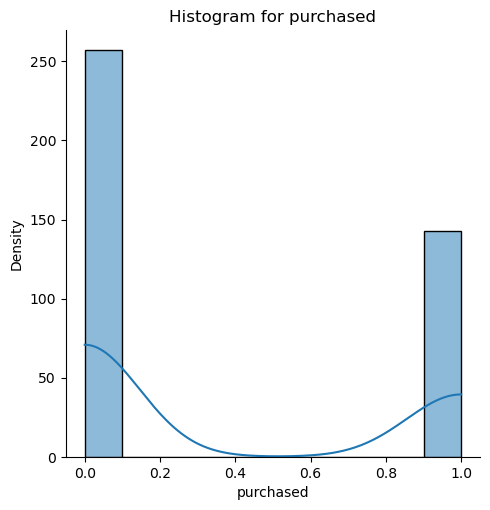

In [21]:
for i in features : 
    sns.displot(df[i], kde = True)
    plt.title(f'Histogram for {i}')
    plt.ylabel('Density')
    plt.show()

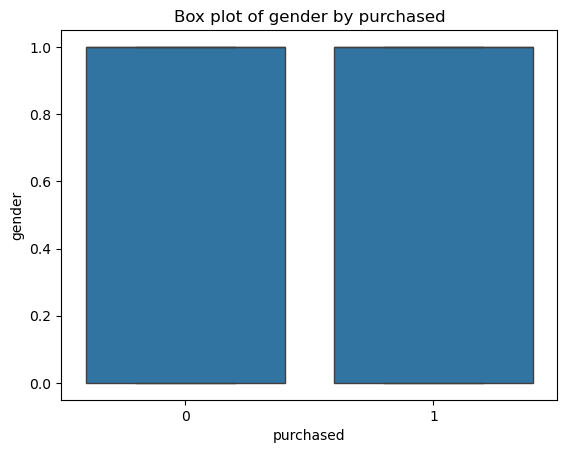

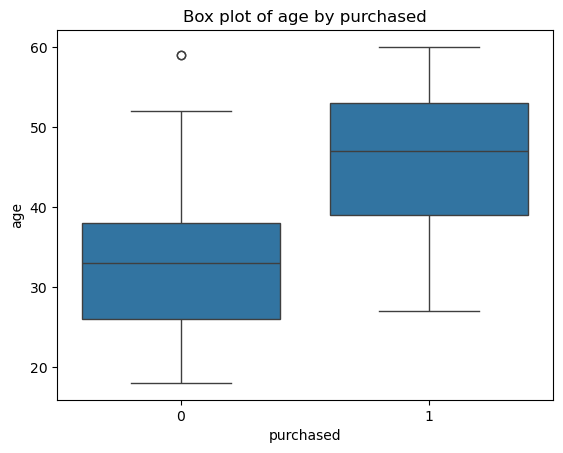

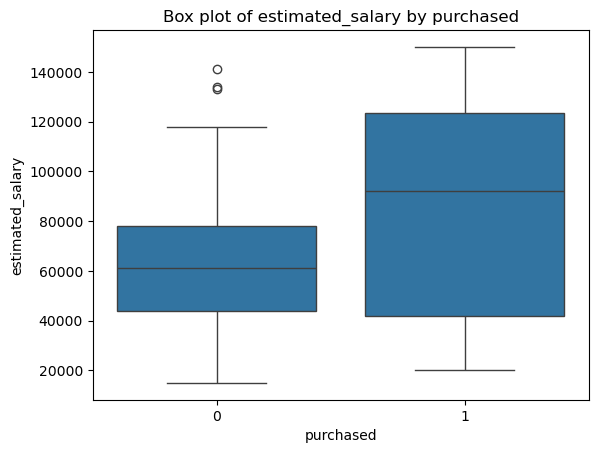

In [20]:
# box plots of numerical features grouped by the target variable
for i in features:
    if i != 'purchased':
        sns.boxplot(x='purchased', y=df[i], data=df)
        plt.title(f'Box plot of {i} by purchased')
        plt.xlabel('purchased')
        plt.ylabel(i)
        plt.show()

In [21]:
df.corr()

,gender,age,estimated_salary,purchased
gender,1.000000,0.093522,0.039119,0.044257
age,0.093522,1.000000,0.170588,0.626505
estimated_salary,0.039119,0.170588,1.000000,0.374928
purchased,0.044257,0.626505,0.374928,1.000000


<Axes: xlabel='purchased', ylabel='count'>

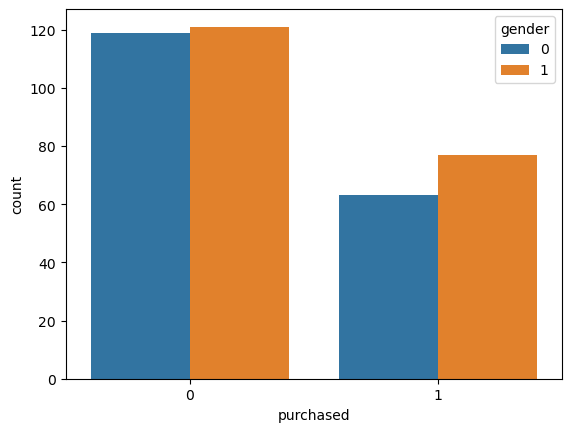

In [22]:
# see the gender difference on purchased
sns.countplot(x='purchased', hue='gender', data=df)

In [22]:
# X and y
X = df.drop(columns=['purchased'])
y = df['purchased']

In [23]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [26]:
# scale X features except gender
# The gender column is categorical and not continuous, so scaling is not appropriate.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['age', 'estimated_salary']] = scaler.fit_transform(X_train[['age', 'estimated_salary']])
X_test[['age', 'estimated_salary']] = scaler.transform(X_test[['age', 'estimated_salary']]) # data leakage
print(X_train.head())
print(X_test.head())

     gender       age  estimated_salary
3         1 -1.066752         -0.386344
18        0  0.797535         -1.229939
202       1  0.110692          1.853544
250       1  0.601294         -0.909955
274       1  1.876859         -1.288118
     gender       age  estimated_salary
209       1  0.797535         -1.404475
280       1  2.073100          0.515429
33        1 -0.968632         -0.764507
210       1  0.993775          0.748145
93        1 -0.870512         -1.229939


In [27]:
#create a logistic regression model
model = LogisticRegression()

In [28]:
#fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# predict on the test data
y_pred = model.predict(X_test)

In [30]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [31]:
# calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8875
Confusion Matrix:
[[50  2]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



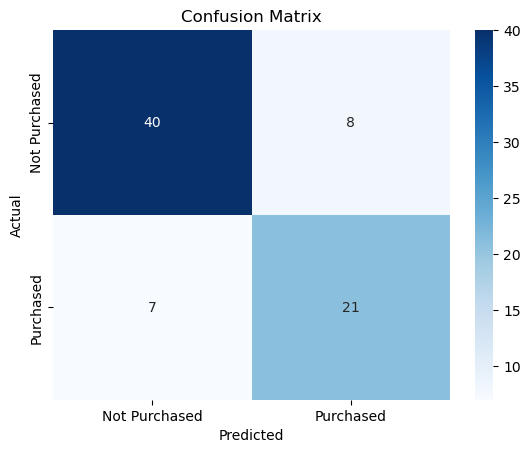

In [38]:
# see confusion matrix with heatmap 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Confusion Matrix in Classification Models

A **confusion matrix** is a table used to evaluate the performance of a classification model. It compares the actual target values with those predicted by the model. The matrix shows the counts of:

- **True Positives (TP):** Correctly predicted positive cases
- **True Negatives (TN):** Correctly predicted negative cases
- **False Positives (FP):** Incorrectly predicted positive cases (Type I error)
- **False Negatives (FN):** Incorrectly predicted negative cases (Type II error)

|                | Predicted Negative | Predicted Positive |
|----------------|-------------------|-------------------|
| **Actual Negative** | TN                | FP                |
| **Actual Positive** | FN                | TP                |

### Why Do We Use Confusion Matrix?

- It provides a detailed breakdown of prediction results.
- Helps identify types of errors (FP, FN).
- Useful for calculating various classification metrics.

---

## Classification Metrics

### 1. **Accuracy**
- **Definition:** Proportion of correct predictions (both positive and negative) out of all predictions.
- **Formula:**  
    `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

### 2. **Precision**
- **Definition:** Proportion of correctly predicted positive cases out of all predicted positive cases.
- **Formula:**  
    `Precision = TP / (TP + FP)`

### 3. **Recall (Sensitivity or True Positive Rate)**
- **Definition:** Proportion of correctly predicted positive cases out of all actual positive cases.
- **Formula:**  
    `Recall = TP / (TP + FN)`

### 4. **F1 Score**
- **Definition:** Harmonic mean of precision and recall. Useful when classes are imbalanced.
- **Formula:**  
    `F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`

---

### **Summary Table**

| Metric     | Measures                                 | Formula                        |
|------------|------------------------------------------|-------------------------------|
| Accuracy   | Overall correctness                      | (TP + TN) / (TP + TN + FP + FN) |
| Precision  | Correctness of positive predictions      | TP / (TP + FP)                |
| Recall     | Coverage of actual positives             | TP / (TP + FN)                |
| F1 Score   | Balance between precision and recall     | 2 * (Precision * Recall) / (Precision + Recall) |

---

**Note:**  
- Use accuracy when classes are balanced.
- Use precision, recall, and F1 score when classes are imbalanced or when the cost of FP/FN is different.

------------------

## Logistic Regression With Hyperparameters and GridSearchCV

## Hyperparameters in Machine Learning

**Hyperparameters** are configuration settings used to control the learning process of machine learning algorithms. 

Unlike model parameters (which are learned from data), hyperparameters are set before training and influence how the model learns.

Link:[Medium Link about Hyperparameters](https://medium.com/@etimfonime/hyperparameters-in-machine-learning-c8b06dde7a31)

<img src="https://miro.medium.com/v2/resize:fit:750/format:webp/1*DjLleDNWsOexIdlTwLgbNA.jpeg"/>

### Examples of Hyperparameters
- Learning rate (for gradient descent)
- Number of trees (in Random Forest)
- Regularization strength (in Logistic Regression)
- Kernel type (in SVM)
- Number of hidden layers (in neural networks)

### Why Are Hyperparameters Important?
- They directly affect model performance and generalization.
- Proper tuning can prevent underfitting or overfitting.
- Different algorithms require different hyperparameters.

---

## GridSearchCV

**GridSearchCV** is a technique for systematically searching for the best combination of hyperparameters for a machine learning model. It performs an exhaustive search over a specified parameter grid using cross-validation.

### How Does GridSearchCV Work?
1. Define a grid of hyperparameter values.
2. For each combination, train and evaluate the model using cross-validation.
3. Select the combination that yields the best performance metric.

### Benefits of GridSearchCV
- **Automated Tuning:** Removes guesswork from hyperparameter selection.
- **Improved Performance:** Finds optimal settings for better accuracy and generalization.
- **Cross-Validation:** Reduces risk of overfitting by evaluating on multiple data splits.
- **Reproducibility:** Provides a systematic and repeatable approach.

---

**Summary:**  
Hyperparameters control the learning process and can significantly impact model performance. GridSearchCV helps automate and optimize hyperparameter selection, leading to more robust and accurate models.

In [42]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [41]:
# create some hyperparameters to tune for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength; smaller values specify stronger regularization
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Algorithm to use in the optimization problem
    'penalty': ['l1', 'l2', 'elasticnet'],  # Specify the norm used in the penalization
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

In [ ]:
# Continue with the same example Social Network Add - Logistic Regression

# create a logistic regression model
model = LogisticRegression()


In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


**Cross-validation** is a technique used to assess how well a machine learning model generalizes to unseen data. 

It works by splitting the dataset into multiple subsets (folds), training the model on some folds, and testing it on the remaining fold(s). 

This process is repeated several times, and the results are averaged to provide a more reliable estimate of model performance. 

The most common method is **k-fold cross-validation**.

<b>Detailed Explanetion Link:</b> https://ompramod.medium.com/cross-validation-623620ff84c2

<img src="https://towardsdatascience.com/wp-content/uploads/2023/12/1N45hocCMP0u4nXLe0WuSvw.png"/>

In [45]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\si

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']},
             scoring='accuracy', verbose=2)

In [46]:
# print the best hyperparameters ingnored during training
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [48]:
# get score of the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
# predict on the test data using the best model
y_pred_best = best_model.predict(X_test)
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix of Best Model:")
print(confusion_matrix(y_test, y_pred_best))


Best Model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Accuracy of Best Model: 0.7894736842105263
Confusion Matrix of Best Model:
[[39  9]
 [ 7 21]]


### RandomizedSearchCV extra

## RandomizedSearchCV

**RandomizedSearchCV** is a hyperparameter tuning technique that randomly samples a fixed number of parameter combinations from a specified distribution, rather than exhaustively searching all possible combinations.

### How RandomizedSearchCV Works
- Specify distributions for each hyperparameter.
- Randomly select a set number of combinations.
- Train and evaluate the model for each sampled combination using cross-validation.
- Select the best performing combination.

### Differences from GridSearchCV

| Feature                | GridSearchCV                          | RandomizedSearchCV                   |
|------------------------|---------------------------------------|--------------------------------------|
| Search Method          | Exhaustive (all combinations)         | Random sampling of combinations      |
| Computational Cost     | High (can be slow for large grids)    | Lower (faster for large grids)       |
| Parameter Coverage     | Complete                              | Partial (depends on n_iter)          |
| Use Case               | Small grids, need all results         | Large grids, limited resources       |

**Summary:**  
- Use GridSearchCV for small, manageable grids.
- Use RandomizedSearchCV for large grids or when computational resources are limited.  
- RandomizedSearchCV can find good hyperparameters faster, but may miss the absolute best if not enough samples are drawn.

In [50]:
# Define a parameter grid for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-3, 3, 100),  # In
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Algorithm to use in the optimization problem
    'penalty': ['l1', 'l2', 'elasticnet'],  # Specify the norm used in the penalization
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42) # n_iter is the number of parameter settings that are sampled
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.3...
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'lbfgs', 'saga',
                                                   'newton-cg']},
                   random_state=42, scoring='accuracy', verbose=2)

In [51]:
# print the best hyperparameters ingnored during training
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)
# get score of the best model
best_model_random = random_search.best_estimator_
print("Best Model from RandomizedSearchCV:", best_model_random)
# predict on the test data using the best model from RandomizedSearchCV
y_pred_best_random = best_model_random.predict(X_test)
print("Accuracy of Best Model from RandomizedSearchCV:", accuracy_score(y_test, y_pred_best_random))
print("Confusion Matrix of Best Model from RandomizedSearchCV:")
print(confusion_matrix(y_test, y_pred_best_random))


Best Hyperparameters from RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'class_weight': None, 'C': np.float64(0.26560877829466867)}
Best Model from RandomizedSearchCV: LogisticRegression(C=np.float64(0.26560877829466867), max_iter=300,
                   penalty='l1', solver='liblinear')
Accuracy of Best Model from RandomizedSearchCV: 0.8157894736842105
Confusion Matrix of Best Model from RandomizedSearchCV:
[[41  7]
 [ 7 21]]


-------------

## ROC and AUC in Classification



**ROC (Receiver Operating Characteristic) Curve**  
- A plot that shows the performance of a classification model at all classification thresholds.
- It displays **True Positive Rate (Recall)** vs. **False Positive Rate**.
- Helps visualize the trade-off between sensitivity and specificity.

**AUC (Area Under the Curve)**  
- Measures the entire two-dimensional area underneath the ROC curve.
- Ranges from 0 to 1; higher values indicate better model performance.
- **AUC = 1** means perfect classification, **AUC = 0.5** means random guessing.

**Why Is It Important?**  
- ROC and AUC help compare models regardless of threshold.
- Useful for imbalanced datasets.
- Provide a single metric to evaluate how well the model distinguishes between classes.

**Detailed Explantion Link:** https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02

<div style="float:right">
<img src="https://miro.medium.com/v2/0*HVIWt0fBsnBgL-cz.png" style="height:500px; width:500px"/>
<img src="https://miro.medium.com/v2/0*9h-FJb3PclpQDVQF.png"style="height:500px; width:500px"/>
</div>

In [53]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

#create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# get predicted probabilities
y_prob = model.predict_proba(X_test)  # Probability estimates for the positive class
print(y_prob)


[[0.1583842  0.8416158 ]
 [0.63845051 0.36154949]
 [0.33204144 0.66795856]
 [0.99049845 0.00950155]
 [0.98205036 0.01794964]
 [0.50940052 0.49059948]
 [0.98905265 0.01094735]
 [0.10217755 0.89782245]
 [0.01361755 0.98638245]
 [0.97776599 0.02223401]
 [0.05925115 0.94074885]
 [0.66581272 0.33418728]
 [0.85889045 0.14110955]
 [0.01534756 0.98465244]
 [0.65352868 0.34647132]
 [0.62447249 0.37552751]
 [0.65685647 0.34314353]
 [0.99296996 0.00703004]
 [0.2423291  0.7576709 ]
 [0.76782404 0.23217596]
 [0.91043056 0.08956944]
 [0.03603555 0.96396445]
 [0.7559893  0.2440107 ]
 [0.99848488 0.00151512]
 [0.99515236 0.00484764]
 [0.52673882 0.47326118]
 [0.60060665 0.39939335]
 [0.96143672 0.03856328]
 [0.85781335 0.14218665]
 [0.99715389 0.00284611]
 [0.39021169 0.60978831]
 [0.44006744 0.55993256]
 [0.52481625 0.47518375]
 [0.06723522 0.93276478]
 [0.95106521 0.04893479]
 [0.99546031 0.00453969]
 [0.36815177 0.63184823]
 [0.53432029 0.46567971]
 [0.67593843 0.32406157]
 [0.36466522 0.63533478]


In [57]:
print(y_prob[:, 1])  # Probability estimates for the positive class

[0.8416158  0.36154949 0.66795856 0.00950155 0.01794964 0.49059948
 0.01094735 0.89782245 0.98638245 0.02223401 0.94074885 0.33418728
 0.14110955 0.98465244 0.34647132 0.37552751 0.34314353 0.00703004
 0.7576709  0.23217596 0.08956944 0.96396445 0.2440107  0.00151512
 0.00484764 0.47326118 0.39939335 0.03856328 0.14218665 0.00284611
 0.60978831 0.55993256 0.47518375 0.93276478 0.04893479 0.00453969
 0.63184823 0.46567971 0.32406157 0.63533478 0.01506821 0.94224145
 0.6225655  0.24014697 0.43288971 0.59155779 0.94595716 0.11060268
 0.07123063 0.90737613 0.28616967 0.97324236 0.99766418 0.94559718
 0.93415858 0.02999173 0.00364801 0.00370811 0.32961902 0.2224446
 0.34371414 0.72071288 0.26878961 0.00874115 0.90036966 0.00162121
 0.58669746 0.02210673 0.41088876 0.51122421 0.98700853 0.50252359
 0.41292405 0.59882242 0.31891602 0.0424493 ]


In [59]:
print(y_test)

274    1
269    0
273    1
39     0
33     0
      ..
326    0
63     1
234    0
83     0
96     0
Name: purchased, Length: 76, dtype: int64


In [60]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

In [61]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.02083333 0.02083333 0.04166667
 0.04166667 0.0625     0.0625     0.08333333 0.08333333 0.22916667
 0.22916667 0.25       0.25       0.41666667 0.41666667 0.45833333
 0.45833333 1.        ]
[0.         0.03571429 0.39285714 0.39285714 0.46428571 0.46428571
 0.5        0.5        0.71428571 0.71428571 0.75       0.75
 0.78571429 0.78571429 0.92857143 0.92857143 0.96428571 0.96428571
 1.         1.        ]
[       inf 0.99766418 0.93415858 0.93276478 0.90036966 0.89782245
 0.8416158  0.7576709  0.60978831 0.59882242 0.59155779 0.47326118
 0.46567971 0.43288971 0.37552751 0.31891602 0.28616967 0.2440107
 0.24014697 0.00151512]


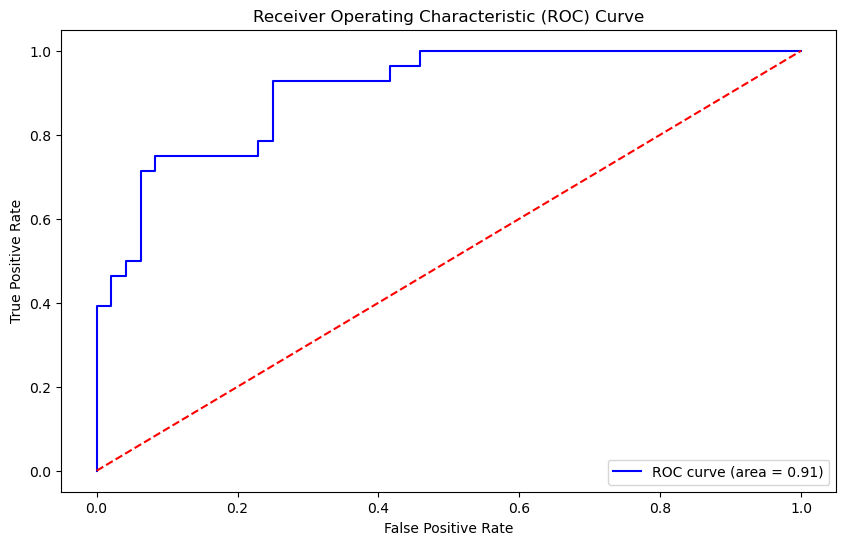

In [62]:
# ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob[:, 1]))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
# show also AUC value
print("AUC:", roc_auc_score(y_test, y_prob[:, 1]))  


AUC: 0.9055059523809524


In [ ]:
thresholds = [0.3, 0.5, 0.7]
for threshold in thresholds:
    y_pred_threshold = (y_prob[:, 1] >= threshold).astype(int)
    
    print(f"Threshold: {threshold}")
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_threshold))
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred_threshold))


Threshold: 0.3
Confusion Matrix:
[[28 20]
 [ 2 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.58      0.72        48
           1       0.57      0.93      0.70        28

    accuracy                           0.71        76
   macro avg       0.75      0.76      0.71        76
weighted avg       0.80      0.71      0.71        76

Threshold: 0.5
Confusion Matrix:
[[40  8]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.72      0.75      0.74        28

    accuracy                           0.80        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.80      0.80        76

Threshold: 0.7
Confusion Matrix:
[[45  3]
 [13 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1

---END---